In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

              Date Symbol  Adj Close      Close       High        Low  \
431802  2009-12-31    CVS        NaN        NaN        NaN        NaN   
431803  2010-01-04    CVS  25.576069  32.980000  33.060001  32.380001   
431804  2010-01-05    CVS  25.475254  32.849998  33.029999  32.660000   
431805  2010-01-06    CVS  25.250359  32.560001  32.980000  32.360001   
431806  2010-01-07    CVS  26.180962  33.759998  33.869999  32.560001   
...            ...    ...        ...        ...        ...        ...   
434926  2022-05-23    CVS  95.570000  95.570000  97.070000  94.980003   
434927  2022-05-24    CVS  96.449997  96.449997  97.010002  94.790001   
434928  2022-05-25    CVS  97.150002  97.150002  98.040001  96.529999   
434929  2022-05-26    CVS  97.800003  97.800003  98.870003  97.629997   
434930  2022-05-27    CVS  98.050003  98.050003  98.099998  95.760002   

             Open      Volume  
431802        NaN         NaN  
431803  32.430000  14676800.0  
431804  32.930000   7512000

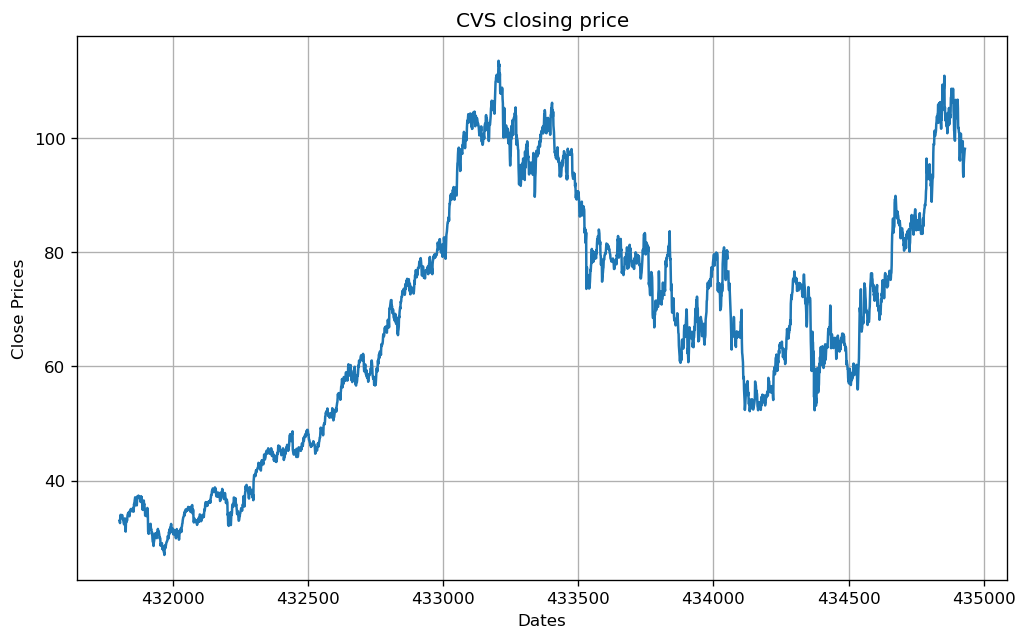

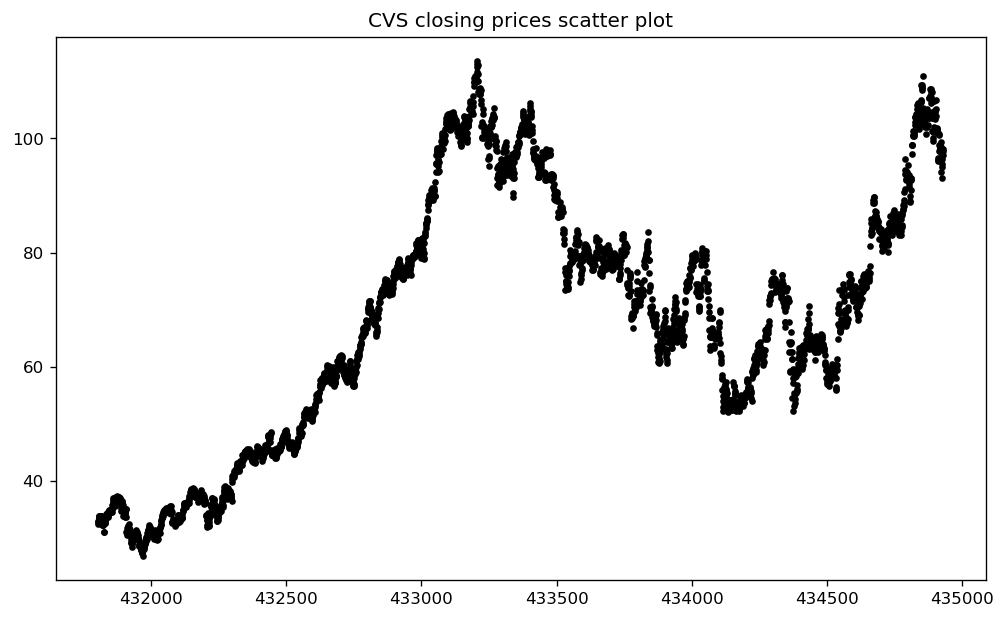

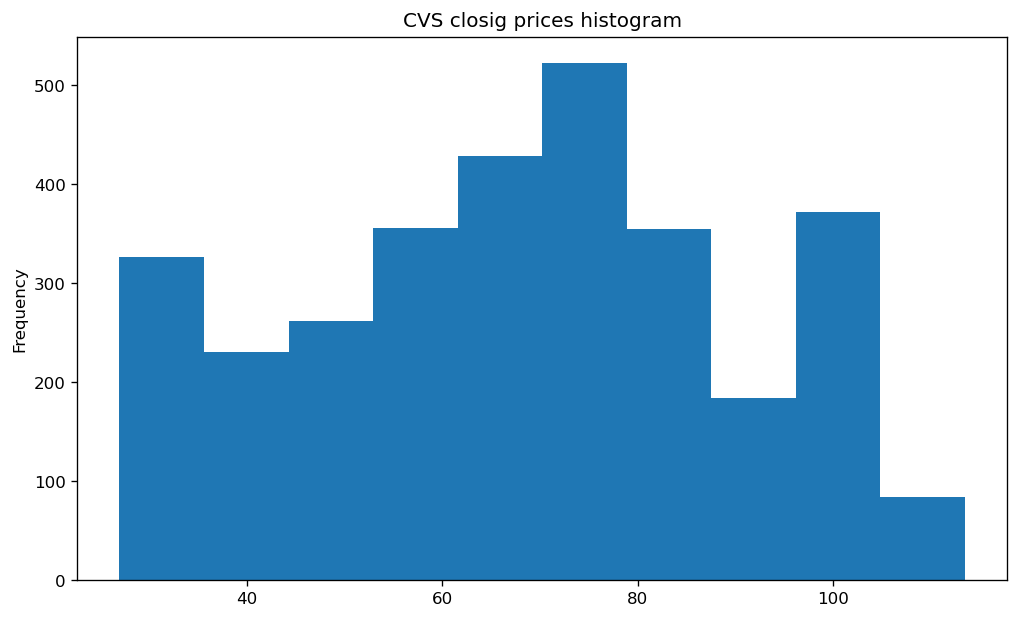

In [20]:
companies = pd.read_csv('./S&PStocks/sp500_companies.csv')
index = pd.read_csv('./S&PStocks/sp500_index.csv')
stocks = pd.read_csv('./S&PStocks/sp500_stocks.csv')

cvs = stocks[stocks['Symbol'] == 'CVS']
# We make a dataframe of daily cvs stock market data

cvs.to_csv('cvs_prices')
# Did not upload entire source stocks csv to github, just saved the used info to an attatched csv

print(cvs)

plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(cvs['Close'])
plt.title('CVS closing price')


plt.figure(figsize = (10,6))
close_prices = cvs['Close']
close_prices.plot(style = 'k.')
plt.title('CVS closing prices scatter plot')

plt.figure(figsize = (10,6))
close_prices.plot(style = 'k.', kind = 'hist')
plt.title('CVS closig prices histogram')


plt.show()

cvs = cvs.dropna()


/var/folders/_r/6qb287c172xghv4mqwzxjy980000gn/T/ipykernel_5796/3111202821.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_additive = seasonal_decompose(cvs.Close.dropna(), model = 'additive', freq = 365)


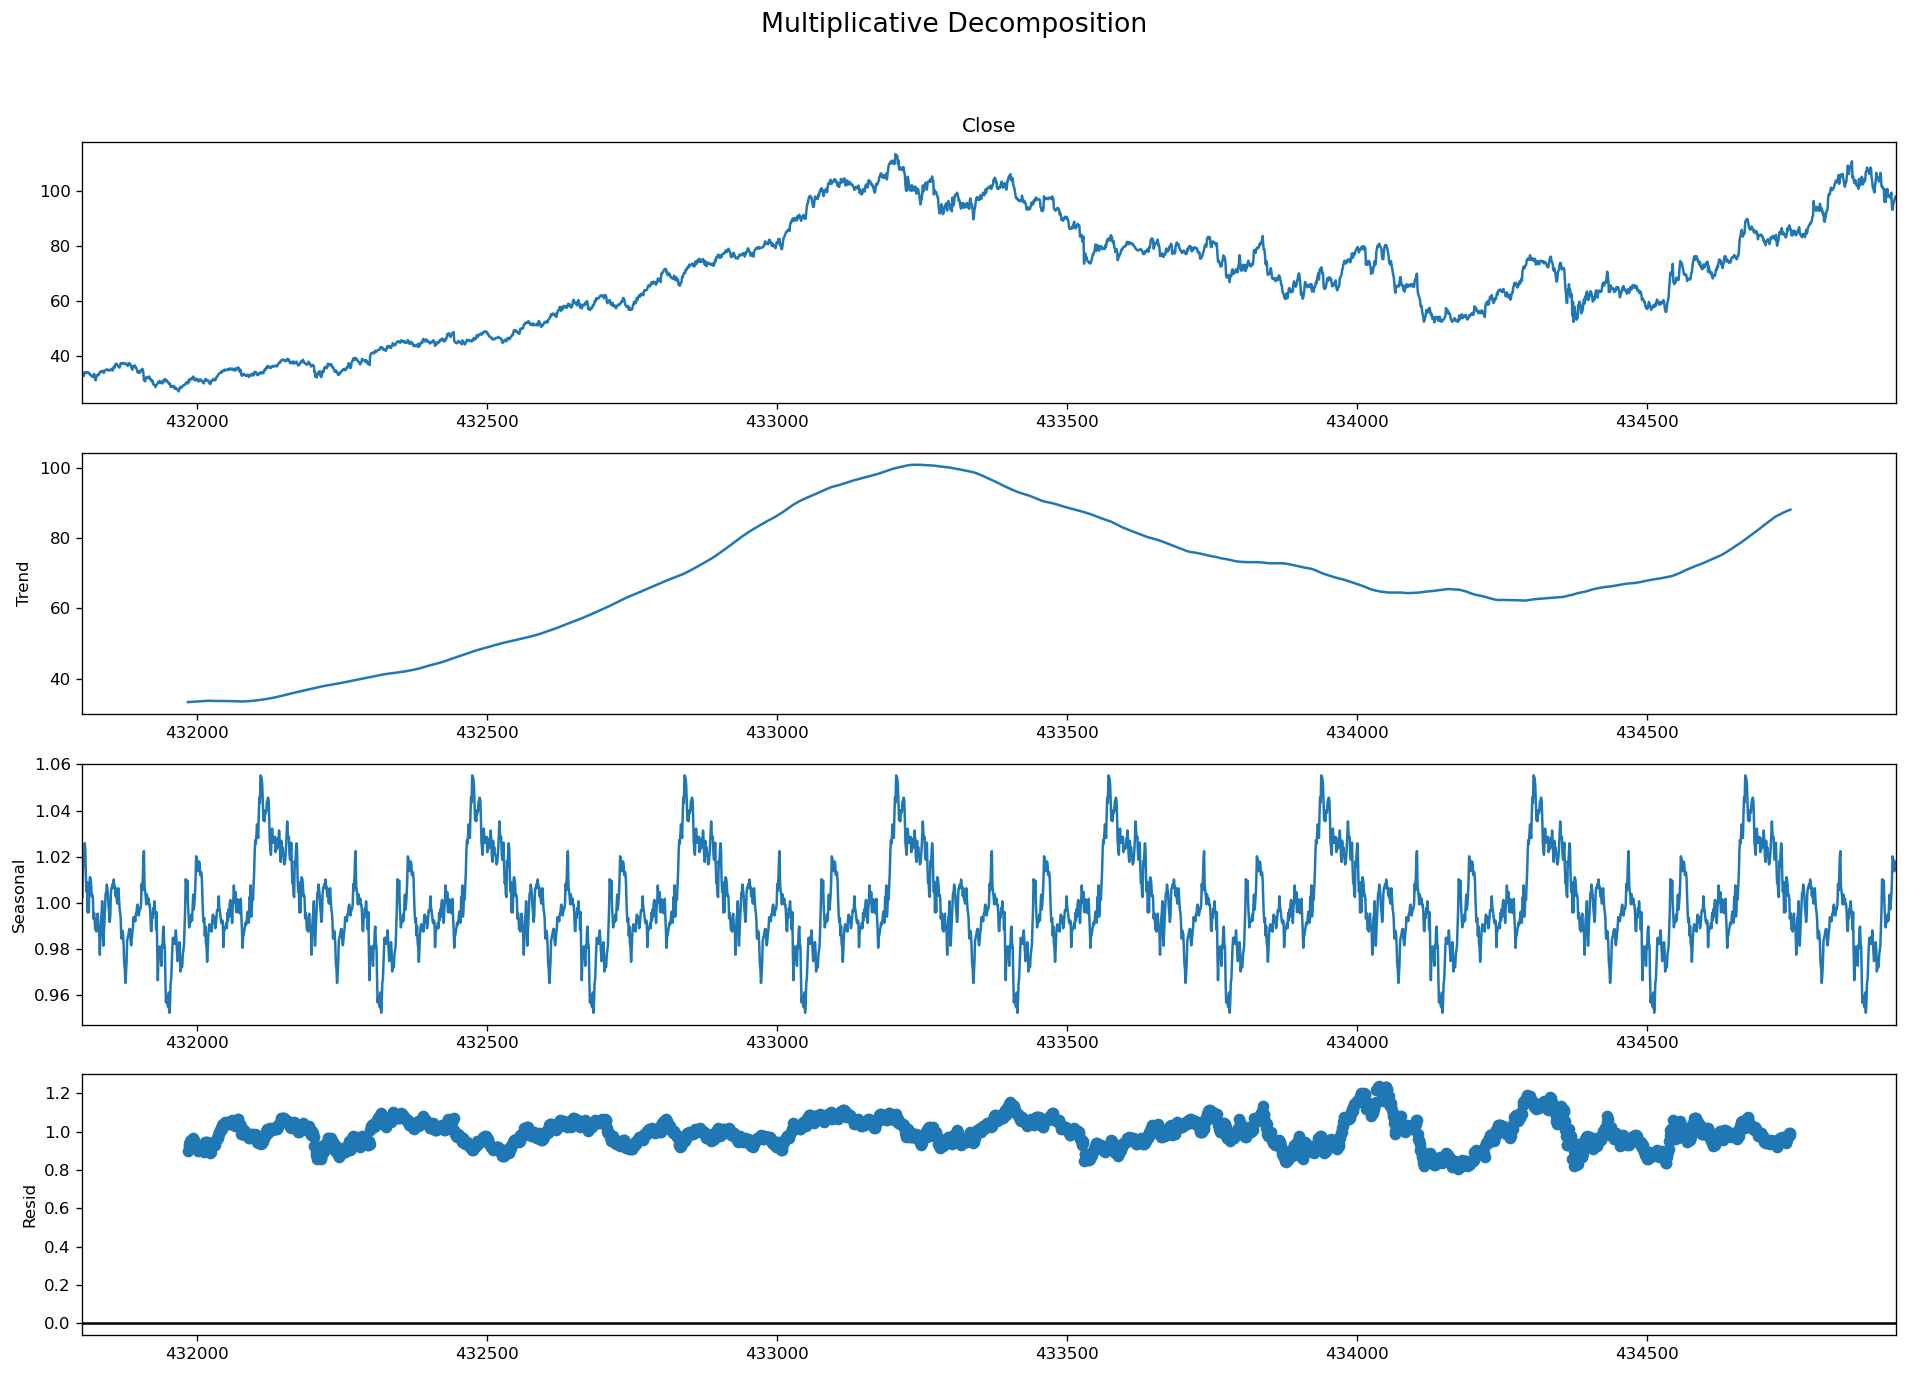

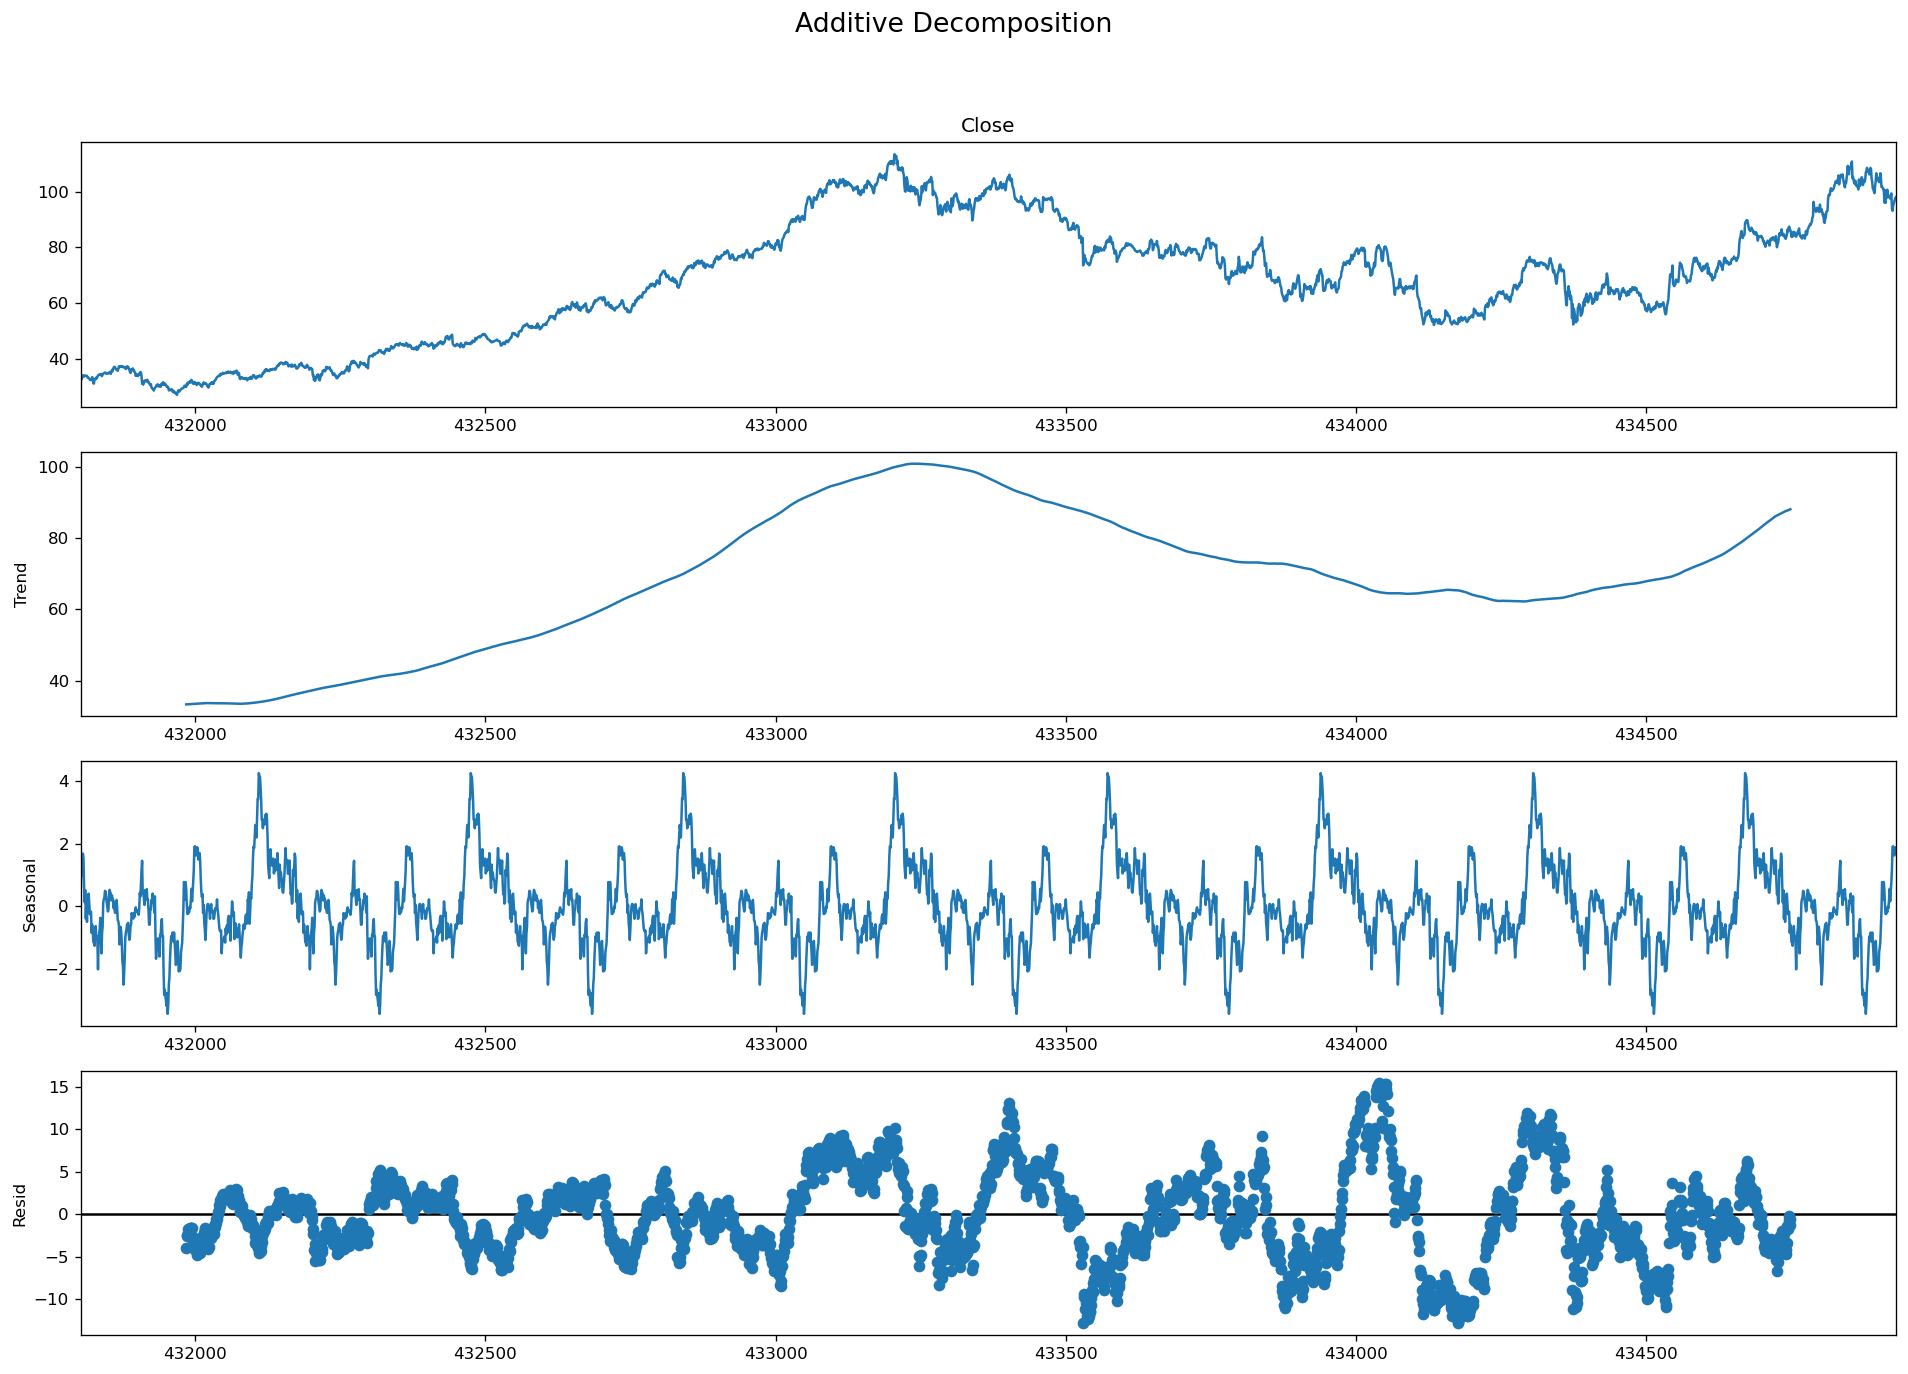

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse



cvsClose = cvs['Close'].to_numpy()
cvsClose = cvsClose[~np.isnan(cvsClose)]

decompose_multiplication = seasonal_decompose(cvs.Close.dropna(), model='multiplicative', period = 365)
decompose_additive = seasonal_decompose(cvs.Close.dropna(), model = 'additive', freq = 365)


plt.rcParams.update({'figure.figsize': (16,12)})
decompose_multiplication.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

decompose_additive.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()




431803    32.980000
431804    32.849998
431805    32.560001
431806    33.759998
431807    34.000000
            ...    
434926    95.570000
434927    96.449997
434928    97.150002
434929    97.800003
434930    98.050003
Name: Close, Length: 3123, dtype: float64


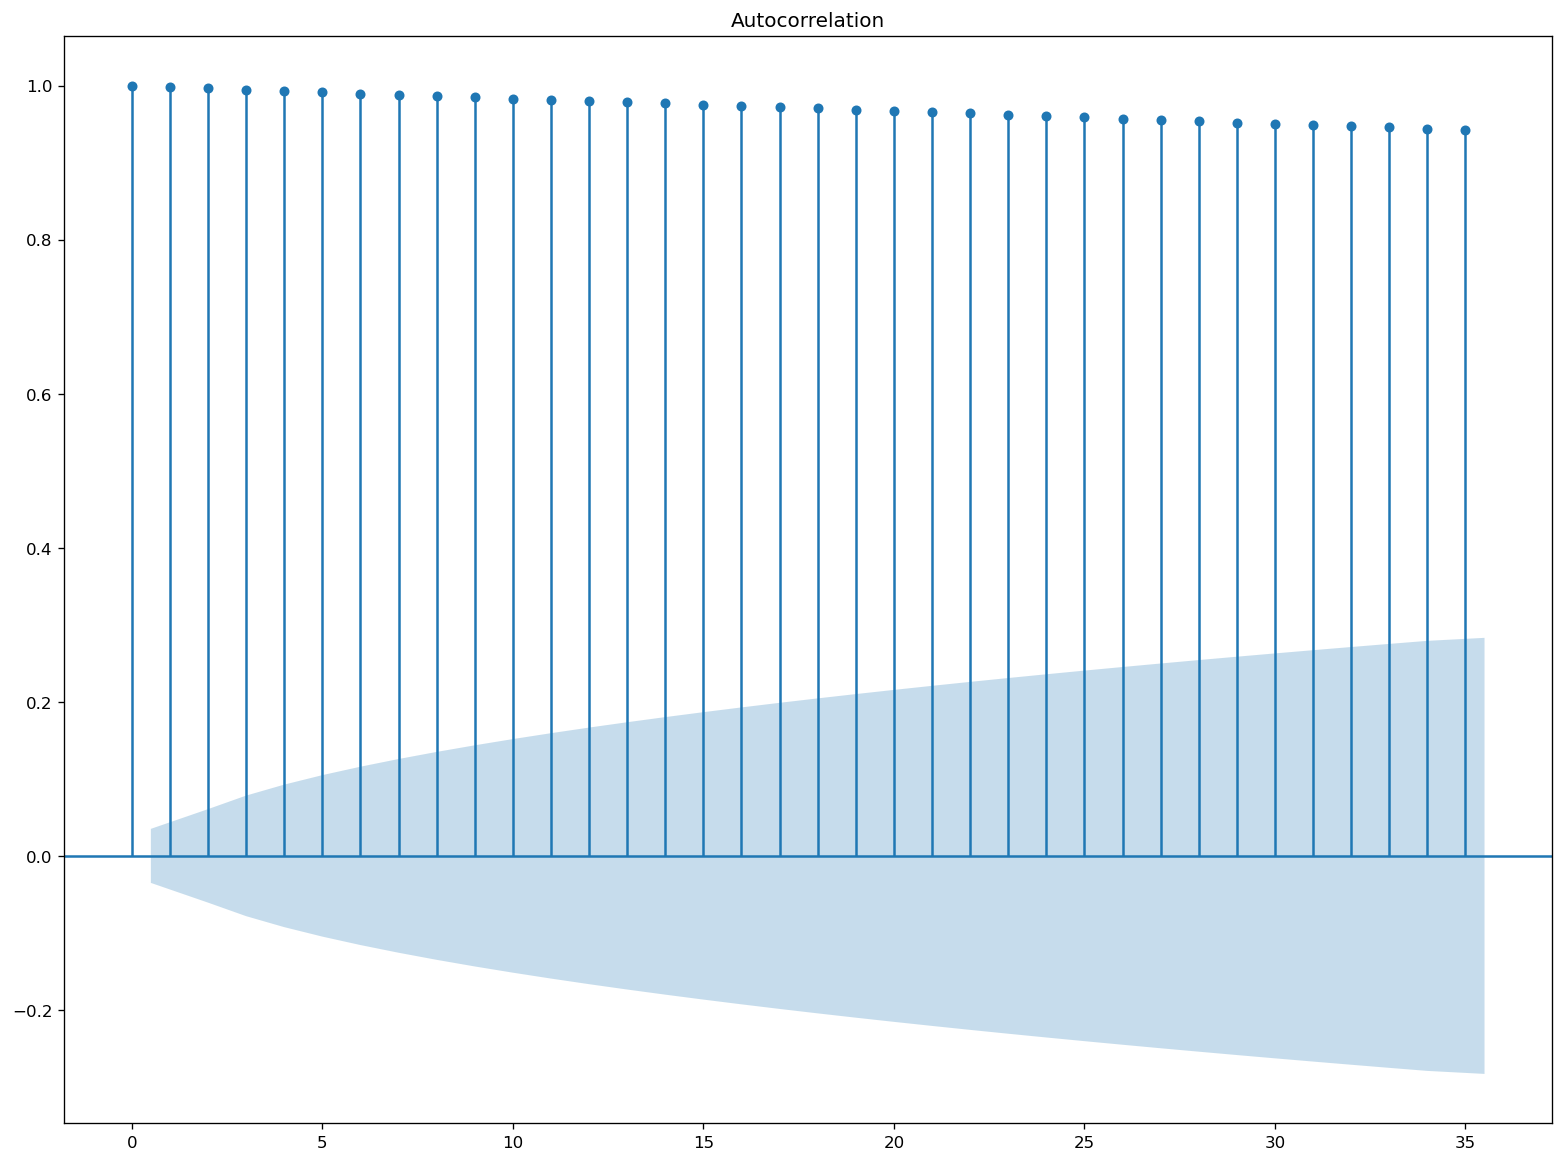

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cvs.Close)

print(cvs.Close)

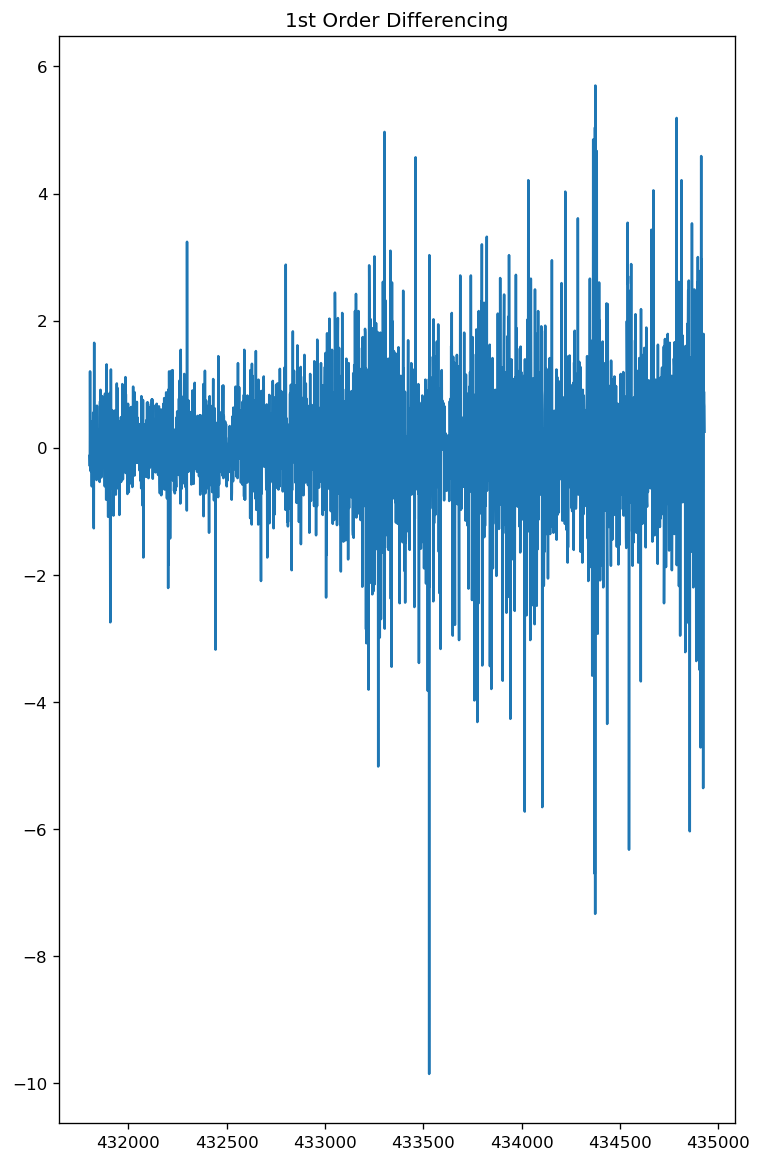

In [23]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
order1diff = cvs.Close.diff()
ax1.plot(order1diff)
plt.show()

431804   -0.130001
431805   -0.289997
431806    1.199997
431807    0.240002
431808   -0.070000
            ...   
434926    0.639999
434927    0.879997
434928    0.700005
434929    0.650002
434930    0.250000
Name: Close, Length: 3122, dtype: float64


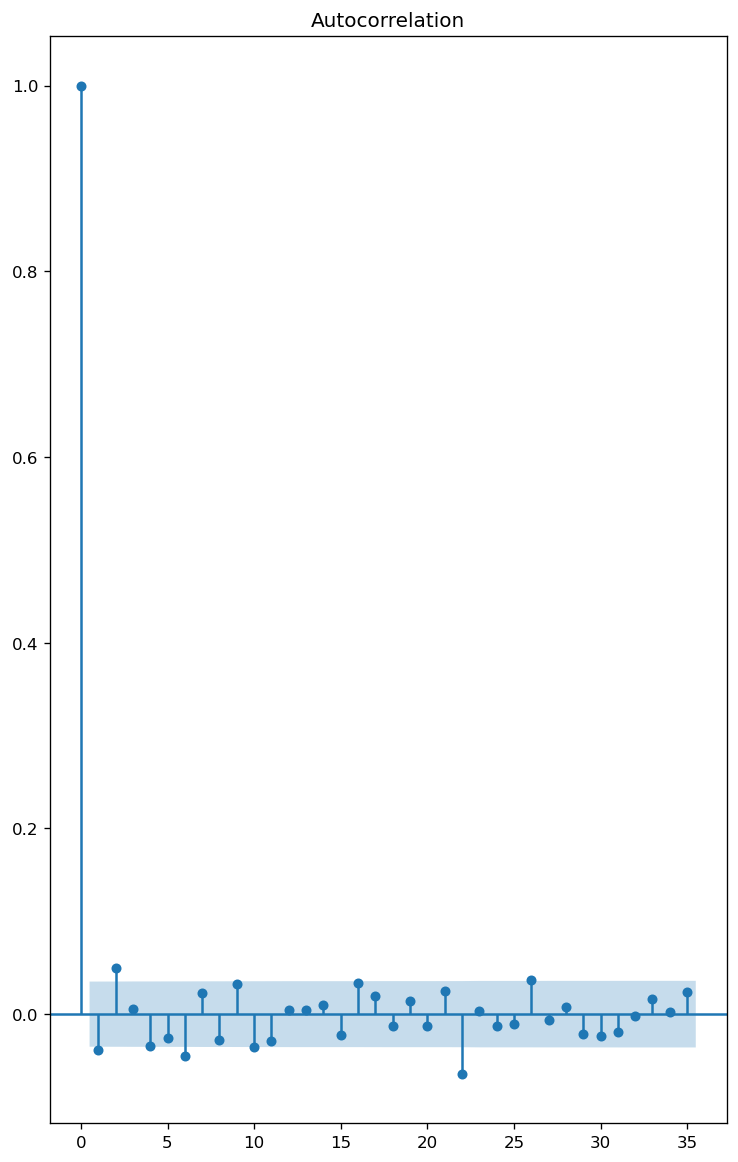

In [24]:
f = plt.figure()
ax2 = f.add_subplot(121)
plot_acf(order1diff.dropna(), ax = ax2)

print(order1diff.dropna())

# q = 2

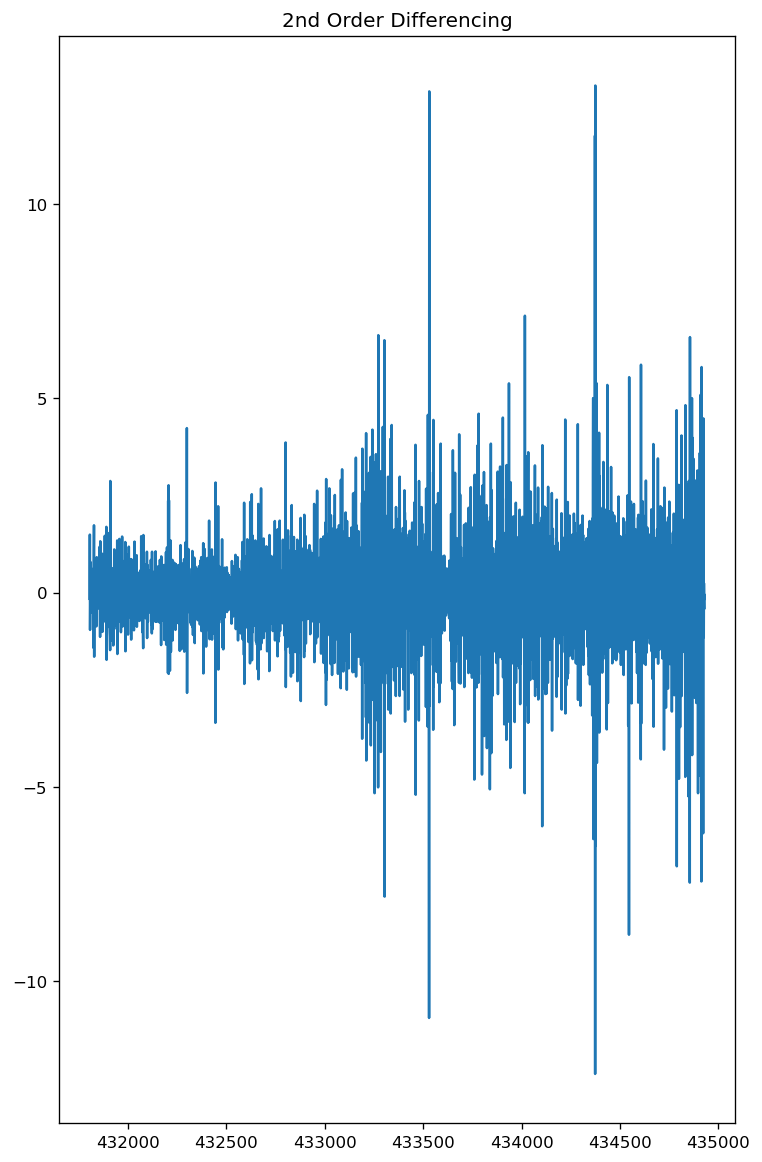

In [25]:
order2diff = order1diff.diff()

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(order2diff)
plt.show()

431805   -0.159996
431806    1.489994
431807   -0.959995
431808   -0.310001
431809   -0.299999
            ...   
434926   -1.150002
434927    0.239998
434928   -0.179993
434929   -0.050003
434930   -0.400002
Name: Close, Length: 3121, dtype: float64


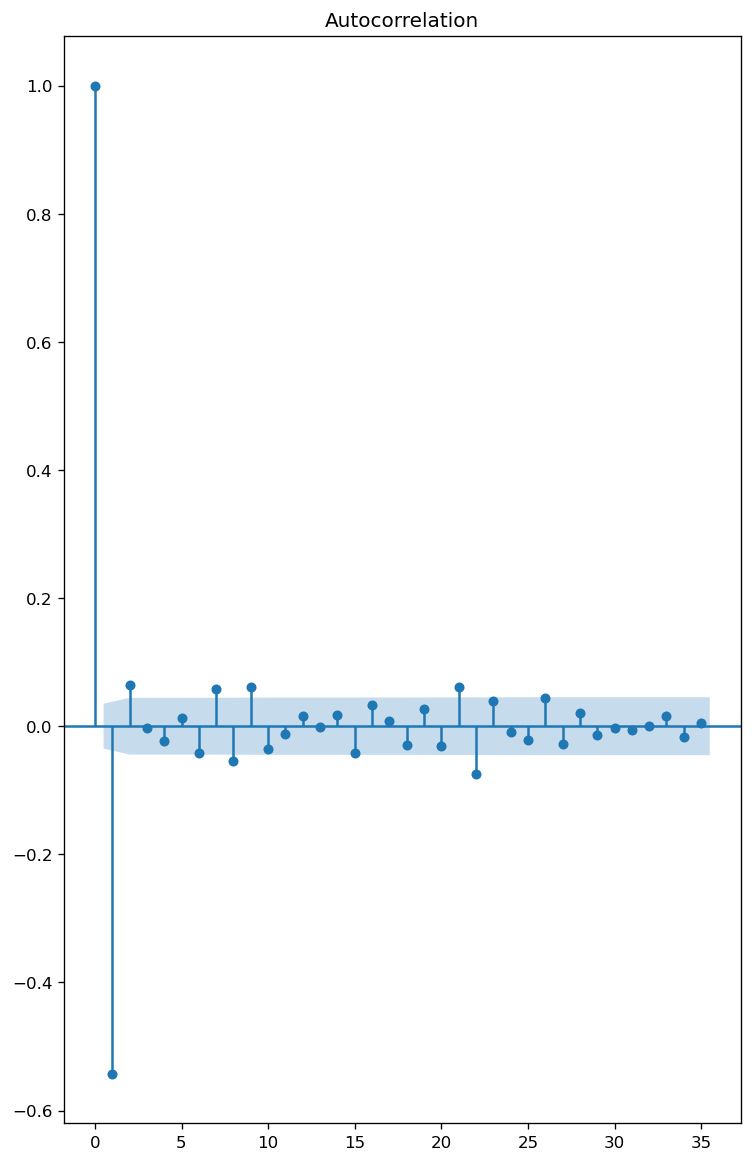

In [26]:
f = plt.figure()
ax2 = f.add_subplot(121)
plot_acf(order2diff.dropna(), ax = ax2)

print(order2diff.dropna())


In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cvs.Close.dropna())
print('No differencing')
print(f'ADF stat- {result[0]}')
print(f'p val- {result[1]}')


result = adfuller(order1diff.dropna())
print('First order differencing')
print(f'ADF stat- {result[0]}')
print(f'p val- {result[1]}')

No differencing
ADF stat- -1.2899892518305962
p val- 0.6337397076167429
First order differencing
ADF stat- -18.325584448588845
p val- 2.2612351852625964e-30


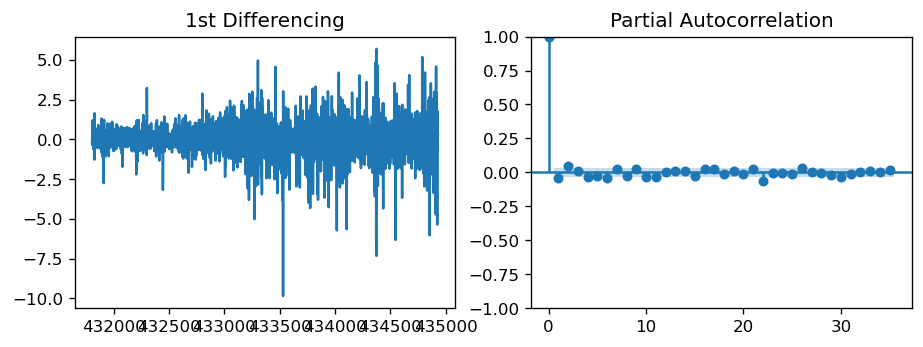

In [28]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(order1diff); axes[0].set_title('1st Differencing')
axes[1].set(ylim = (-1,1))
plot_pacf(order1diff.dropna(), ax = axes[1])
plt.show()

No handles with labels found to put in legend.


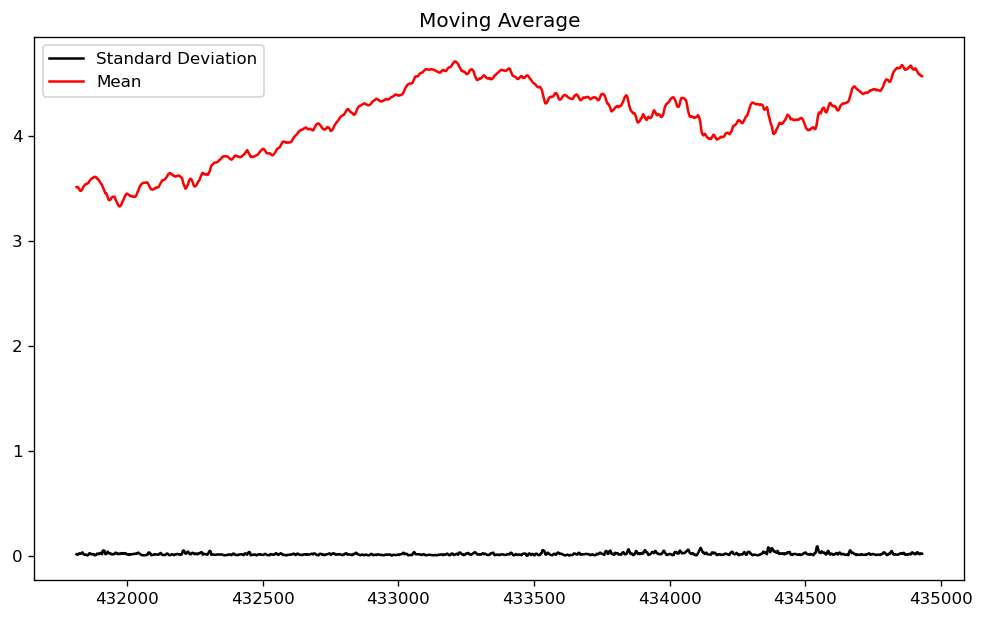

In [29]:
# Lets eliminate the trend

from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
df_log = np.log(cvs.Close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_avg, color = 'red', label = 'Mean')
plt.legend()
plt.show()

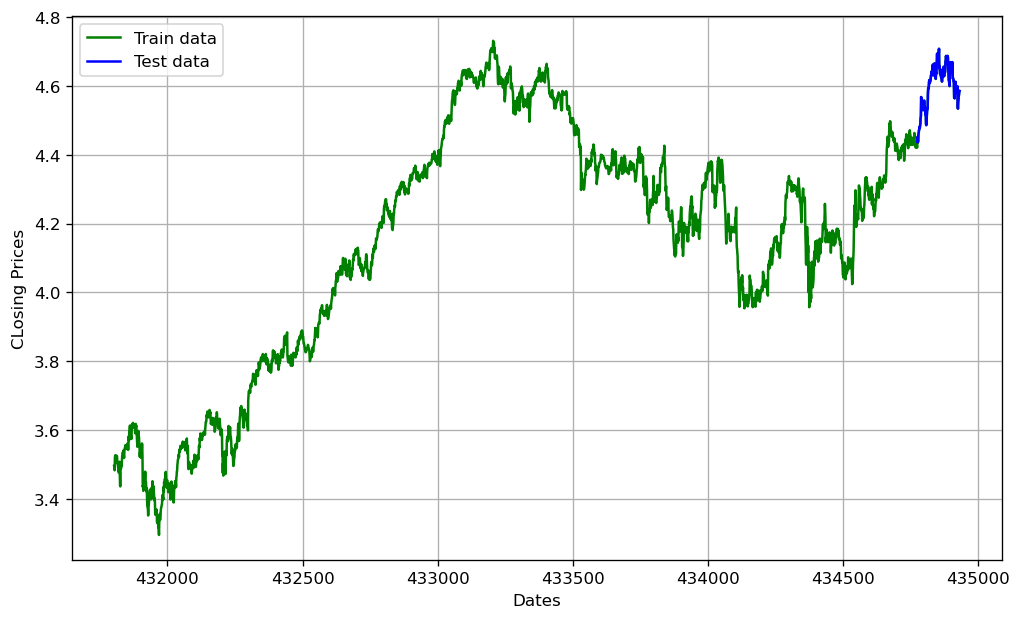

In [30]:
# We split into train and test data

train_data, test_data = df_log[3: int(len(df_log) * 0.95)], df_log[int(len(df_log)*0.95):]
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('CLosing Prices')
plt.plot(df_log, 'green', label = 'Train data')
plt.plot(test_data, 'blue', label = 'Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16456.498, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16459.999, Time=0.72 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16459.363, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16457.284, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-16469.793, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-16467.803, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-16467.789, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16462.730, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-16465.812, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-16470.629, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16460.677, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-16468.635, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-16468.627, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-16463.409, Time=0.48 sec
 ARIM

/Users/henrysaltzman/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


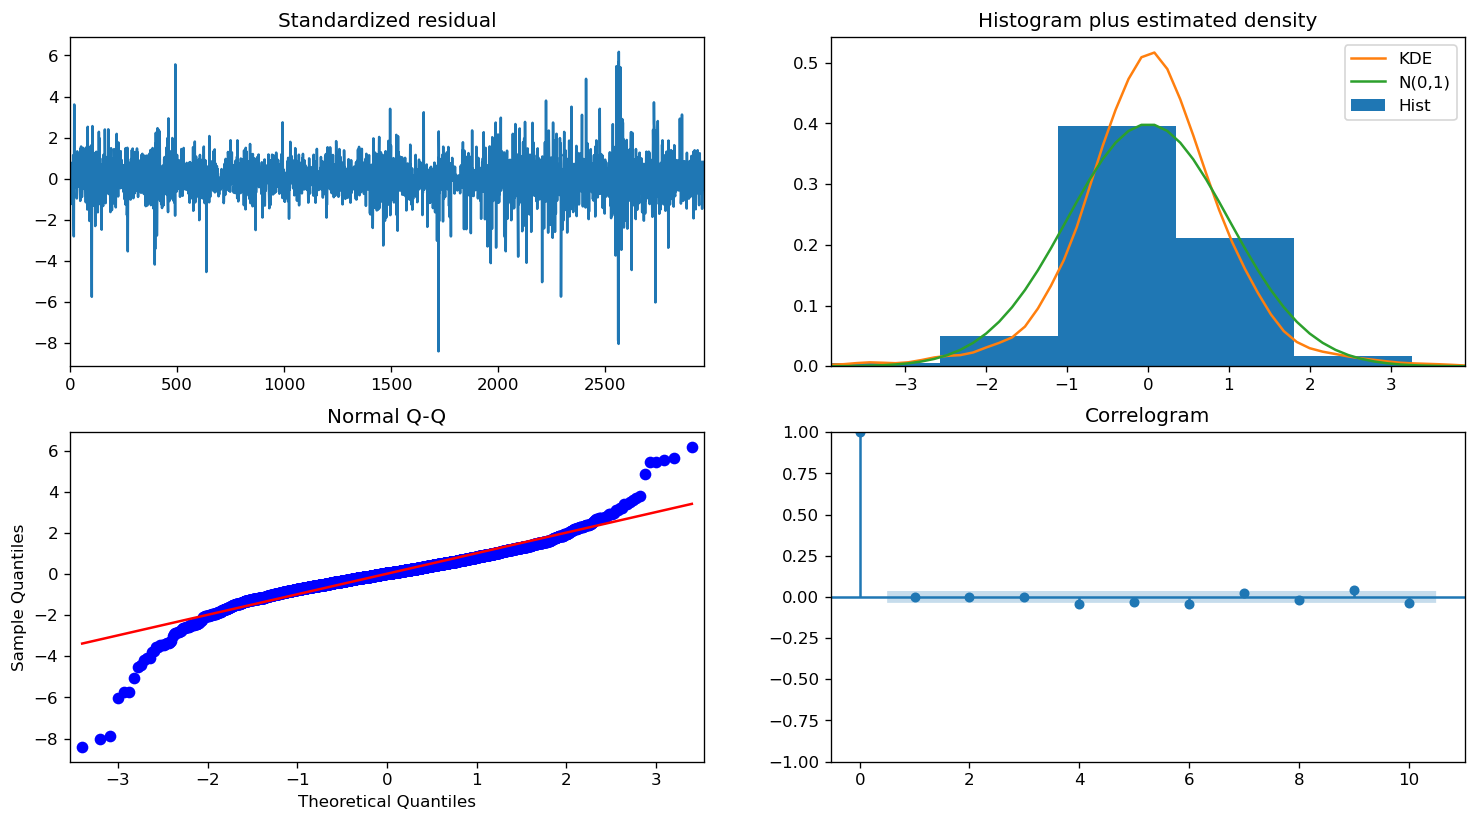

In [31]:
# We use auto arima to verify coefficients

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

model_auto = auto_arima(
train_data, # We train with the log of cvs close data we computed before
start_p = 0, 
start_q = 0, 
test = 'adf', # Use the adf test to calculate d as we did before
max_p = 3,
max_q = 3,
m = 1,
d = None,
seasonal = False,
start_P = 0,
D = 0,
trace = True,
error_action = 'ignore',
suppress_warnings = True,
stepwise = True
)

print(model_auto.summary())
model_auto.plot_diagnostics(figsize=(15,8))
plt.show()

In [32]:
model = ARIMA(train_data, order = (2, 1, 0))
fitted = model.fit(disp = 1)
print(fitted.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78153D+00    |proj g|=  6.89377D-03

At iterate    1    f= -2.78153D+00    |proj g|=  1.78968D-05

At iterate    2    f= -2.78153D+00    |proj g|=  2.12719D-04

At iterate    3    f= -2.78153D+00    |proj g|=  4.97113D-04

At iterate    4    f= -2.78153D+00    |proj g|=  9.28102D-04

At iterate    5    f= -2.78153D+00    |proj g|=  9.57678D-04

At iterate    6    f= -2.78153D+00    |proj g|=  4.68336D-04

At iterate    7    f= -2.78153D+00    |proj g|=  7.70051D-05

At iterate    8    f= -2.78153D+00    |proj g|=  3.19744D-06

At iterate    9    f= -2.78153D+00    |proj g|=  1.59872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/henrysaltzman/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/henrysaltzman/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was p

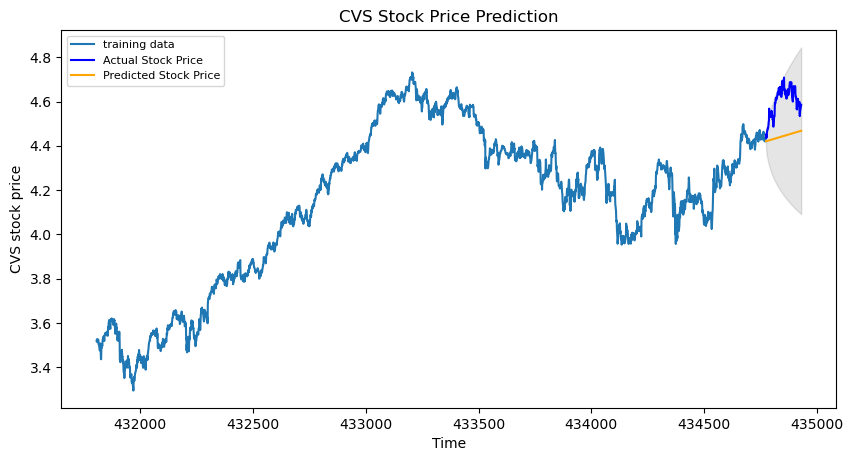

In [33]:
fc, se, conf = fitted.forecast(157, alpha=0.05)


fc_series = pd.Series(fc, index = test_data.index)
lower_series = pd.Series(conf[:, 0], index = test_data.index)
upper_series = pd.Series(conf[:, 1], index = test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title('CVS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CVS stock price')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print('MSE: ' ,mean_squared_error(test_data, fc))
print('MAE: ' ,mean_squared_error(test_data, fc))
print('RMSE: ', math.sqrt(mean_squared_error(test_data, fc)))
print('MAPE: ', np.mean(np.abs(fc - test_data)/np.abs(test_data)))

MSE:  0.028046980729810572
MAE:  0.028046980729810572
RMSE:  0.16747232825099964
MAPE:  0.033996904221611716
